In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load The Data

In [2]:
df=pd.read_csv('D:/PGP IN DATA SCIENCE with Careerera/Data Sets/Titanic(2).csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


#### Column Information

* passenger_id: Passenger number
* pclass: 1=First class, 2=Second class, 3=Third class
* name: Name of passenger
* sex: Gender
* age: Age of passenger
* sibsp: Number of siblings
* parch: Parent Children
* ticket: Ticket Number
* fare: Ticket Fare
* cabin: Cabin number
* embarked: C=Cherbourg, Q=Queenstown, S=Southampton
* survived: 0=Dead, 1=Alive

In [3]:
df.shape

(850, 15)

In [4]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

In [5]:
df.dtypes

passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
boat             object
body            float64
home.dest        object
survived          int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


#### Null value count

In [7]:
df.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

Here passanger_id, name, ticket, cabin, boat,body & home.dest doesnt contains any information so its better to drop these columns

In [8]:
df.drop(['passenger_id','name', 'ticket','cabin','boat','body','home.dest' ],inplace=True, axis=1)
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'survived'],
      dtype='object')

In [9]:
df.isna().sum()

pclass        0
sex           0
age         174
sibsp         0
parch         0
fare          1
embarked      1
survived      0
dtype: int64

##### Fill the nan rows in age column

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


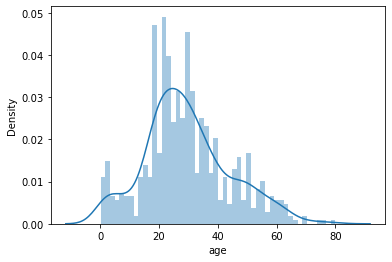

In [10]:
# Distribution of age data
sns.distplot(df.age,bins=50);

In [11]:
#replace nan with mean of age column
df.age.fillna(df.age.mean(), inplace=True)
df.age.isna().sum()

0

In [12]:
#drop nan rows from data set
df.dropna(axis=0,inplace=True)
df.shape

(848, 8)

In [13]:
df.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

#### Exploratory Data Analysis

In [14]:
df.pclass.value_counts()

3    477
1    205
2    166
Name: pclass, dtype: int64

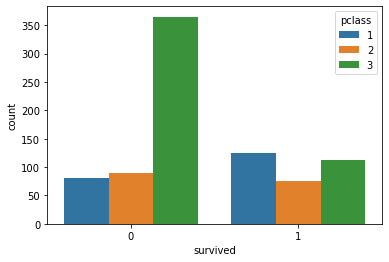

In [15]:
sns.countplot(x='survived', data=df, hue='pclass');

most passengers in paclass-3 has been died, pclass-1 have more chances to survive.

In [16]:
df.sex.value_counts()

male      550
female    298
Name: sex, dtype: int64

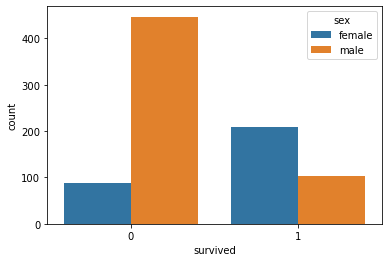

In [17]:
sns.countplot(x='survived', data=df, hue='sex');

Gender female has higher chances of survival, priority is given to female & children while running rescue operation.

In [18]:
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,2.320755,29.473314,0.523585,0.383255,33.958471,0.367925
std,0.837968,12.952837,1.113154,0.880352,53.714209,0.482525
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,29.519847,0.000000,0.000000,14.054150,0.000000
75%,3.000000,34.500000,1.000000,0.000000,30.771850,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


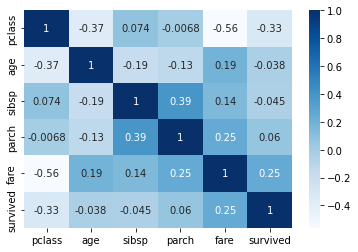

In [19]:
# corelation between columns
sns.heatmap(df.corr(), annot=True,cmap='Blues');

#### Feature Engineering

In [20]:
df.dtypes=='object'

pclass      False
sex          True
age         False
sibsp       False
parch       False
fare        False
embarked     True
survived    False
dtype: bool

In [21]:
#create dummies for column sex & embarked
dum1=pd.get_dummies(df.sex)
dum2=pd.get_dummies(df.embarked)
data=pd.concat([df,dum1,dum2], axis=1)
data.drop(['sex','embarked'],axis=1,inplace=True)
data.head()

,pclass,age,sibsp,parch,fare,survived,female,male,C,Q,S
0,3,29.519847,0,0,7.7333,1,1,0,0,1,0
1,3,38.000000,0,0,8.6625,0,0,1,0,0,1
2,3,30.000000,1,1,24.1500,0,1,0,0,0,1
3,2,54.000000,1,3,23.0000,1,1,0,0,0,1
4,2,40.000000,0,0,13.0000,0,0,1,0,0,1


#### Create features(Independent) & Label(Dependent)

In [22]:
X=data.drop('survived', axis=1)
y=data.survived.values

#### Normalise the Features

In [23]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X=std.fit_transform(X)
print(X)

[[ 0.8110649   0.00359464 -0.47063906 ... -0.51176632  3.01583124
  -1.50384124]
 [ 0.8110649   0.65867564 -0.47063906 ... -0.51176632 -0.33158354
   0.66496381]
 [ 0.8110649   0.04068584  0.42823914 ... -0.51176632 -0.33158354
   0.66496381]
 ...
 [-0.38300287 -0.42280651  0.42823914 ... -0.51176632 -0.33158354
   0.66496381]
 [ 0.8110649  -2.04502974  0.42823914 ... -0.51176632 -0.33158354
   0.66496381]
 [-0.38300287  1.74015778 -0.47063906 ... -0.51176632 -0.33158354
   0.66496381]]


#### Split data into train & test set

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print("Train Size", len(x_train))
print("Test Size",len(x_test))

Train Size 678
Test Size 170


#### Create Logistic Regression Model & Fit the Data  to Train our model

In [25]:
from sklearn.linear_model import LogisticRegression
# Set regularization rate
reg = 0.01
log_reg=LogisticRegression()
log_reg=log_reg.fit(x_train,y_train)

#### Training & Testing Accuarcy

In [26]:
print("Training Accuracy:", log_reg.score(x_train,y_train))
print("Testing Accuracy:", log_reg.score(x_test,y_test))

Training Accuracy: 0.7935103244837758
Testing Accuracy: 0.7823529411764706


both accuracy are close to each other

#### Prediction Accuracy of model

In [27]:
y_pred=log_reg.predict(x_test)
print('Predicted labels: ', y_pred)
print('Actual labels:    ', y_test)

Predicted labels:  [0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1]
Actual labels:     [0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0]


In [28]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7823529411764706


#### Classification Report

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       111
           1       0.70      0.64      0.67        59

    accuracy                           0.78       170
   macro avg       0.76      0.75      0.75       170
weighted avg       0.78      0.78      0.78       170



In [30]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:", precision_score(y_test, y_pred))
print("Overall Recall:", recall_score(y_test, y_pred))

Overall Precision: 0.7037037037037037
Overall Recall: 0.6440677966101694


#### Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[95 16]
 [21 38]]


#### Proobability of accurate prediction

In [32]:
y_scores = log_reg.predict_proba(x_test)
print(y_scores)

[[0.7798956  0.2201044 ]
 [0.53573184 0.46426816]
 [0.47880481 0.52119519]
 [0.95017004 0.04982996]
 [0.86751615 0.13248385]
 [0.90082146 0.09917854]
 [0.86563845 0.13436155]
 [0.36001444 0.63998556]
 [0.46327584 0.53672416]
 [0.32370975 0.67629025]
 [0.77689582 0.22310418]
 [0.86967167 0.13032833]
 [0.93579776 0.06420224]
 [0.43613463 0.56386537]
 [0.90075848 0.09924152]
 [0.91741278 0.08258722]
 [0.08299934 0.91700066]
 [0.90230228 0.09769772]
 [0.77561017 0.22438983]
 [0.60365615 0.39634385]
 [0.92396644 0.07603356]
 [0.39425836 0.60574164]
 [0.94450943 0.05549057]
 [0.88078972 0.11921028]
 [0.3241721  0.6758279 ]
 [0.53005406 0.46994594]
 [0.12995232 0.87004768]
 [0.63504412 0.36495588]
 [0.86492077 0.13507923]
 [0.9255358  0.0744642 ]
 [0.10540219 0.89459781]
 [0.89809193 0.10190807]
 [0.94273372 0.05726628]
 [0.88031906 0.11968094]
 [0.6923277  0.3076723 ]
 [0.70225481 0.29774519]
 [0.27799405 0.72200595]
 [0.90082146 0.09917854]
 [0.86539963 0.13460037]
 [0.65200155 0.34799845]


#### ROC Curve

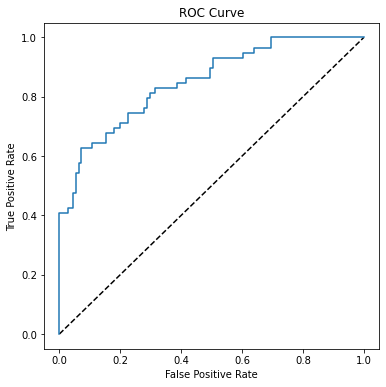

In [33]:
from sklearn.metrics import roc_curve

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()